/tmp/ipykernel_102479/2454723.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])


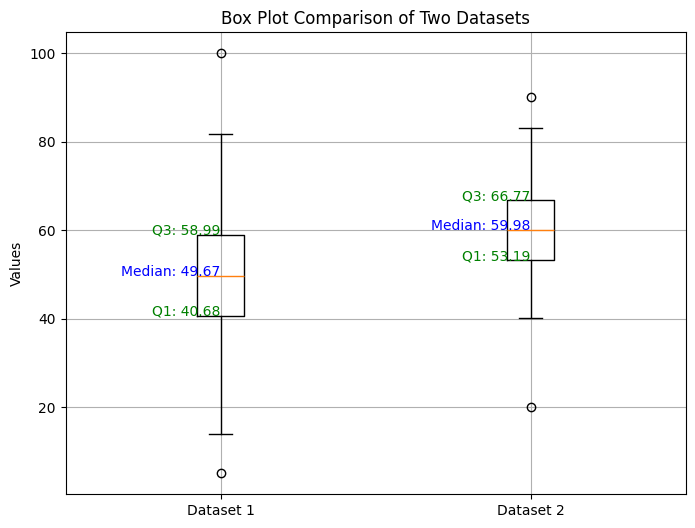

' Explanation:\n# - The box represents the interquartile range (IQR) from Q1 to Q3.\n# - The line inside the box is the median (Q2).\n# - The "whiskers" extend to the smallest and largest non-outlier values.\n# - Any dots outside the whiskers are potential outliers.\n# - The plot helps visualize skewness (if the median is not centered) and variability.\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two datasets with potential outliers
data1 = np.random.normal(50, 15, 40).tolist() + [100, 5]  # Adding outliers
\data2 = np.random.normal(60, 10, 40).tolist() + [90, 20]  # Adding different outliers

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])

# Calculate quartiles and median
q1_data1, q3_data1 = np.percentile(data1, [25, 75])
median_data1 = np.median(data1)
q1_data2, q3_data2 = np.percentile(data2, [25, 75])
median_data2 = np.median(data2)

# Annotate median and quartiles
plt.text(1, median_data1, f'Median: {median_data1:.2f}', ha='right', color='blue')
plt.text(2, median_data2, f'Median: {median_data2:.2f}', ha='right', color='blue')

plt.text(1, q1_data1, f'Q1: {q1_data1:.2f}', ha='right', color='green')
plt.text(1, q3_data1, f'Q3: {q3_data1:.2f}', ha='right', color='green')
plt.text(2, q1_data2, f'Q1: {q1_data2:.2f}', ha='right', color='green')
plt.text(2, q3_data2, f'Q3: {q3_data2:.2f}', ha='right', color='green')

plt.title('Box Plot Comparison of Two Datasets')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Explanation:
# - The box represents the interquartile range (IQR) from Q1 to Q3.
# - The line inside the box is the median (Q2).
# - The "whiskers" extend to the smallest and largest non-outlier values.
# - Any dots outside the whiskers are potential outliers.
# - The plot helps visualize skewness (if the median is not centered) and variability.


In [5]:
import numpy as np
import pandas as pd

def count_missing_values(data):
    return sum(pd.isna(data))

def impute_missing_values(data, method="fixed", fixed_value=0):
    df = pd.Series(data)
    
    if method == "fixed":
        df.fillna(fixed_value, inplace=True)
    elif method == "mean":
        mean_value = df.dropna().mean()
        df.fillna(mean_value, inplace=True)
    elif method == "forward_fill":
        df.fillna(method='ffill', inplace=True)
    elif method == "backward_fill":
        df.fillna(method='bfill', inplace=True)
    
    return df.tolist()

data = [12, 15, None, 20, np.nan, 22, 25]
print("Original Data:", data)

# Count missing values
missing_count = count_missing_values(data)
print("Missing values count:", missing_count)

# Compute mean before imputation
original_mean = np.nanmean([x for x in data if x is not None])
print("Mean before imputation:", original_mean)

# Impute missing values using different methods
fixed_imputed = impute_missing_values(data, method="fixed", fixed_value=0)
mean_imputed = impute_missing_values(data, method="mean")
forward_filled = impute_missing_values(data, method="forward_fill")
backward_filled = impute_missing_values(data, method="backward_fill")

# Compute mean after imputation
fixed_mean = np.mean(fixed_imputed)
mean_imputed_mean = np.mean(mean_imputed)

print("\nAfter Fixed Imputation:", fixed_imputed, "Mean:", fixed_mean)
print("After Mean Imputation:", mean_imputed, "Mean:", mean_imputed_mean)
print("After Forward Fill:", forward_filled)
print("After Backward Fill:", backward_filled)


Original Data: [12, 15, None, 20, nan, 22, 25]
Missing values count: 2
Mean before imputation: 18.8

After Fixed Imputation: [12.0, 15.0, 0.0, 20.0, 0.0, 22.0, 25.0] Mean: 13.428571428571429
After Mean Imputation: [12.0, 15.0, 18.8, 20.0, 18.8, 22.0, 25.0] Mean: 18.8
After Forward Fill: [12.0, 15.0, 15.0, 20.0, 20.0, 22.0, 25.0]
After Backward Fill: [12.0, 15.0, 20.0, 20.0, 22.0, 22.0, 25.0]


/tmp/ipykernel_102479/4190758288.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipykernel_102479/4190758288.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Enter Dataset 1 (comma-separated) or press Enter to generate randomly:  12,15,17,20,61
Enter Dataset 2 (comma-separated) or press Enter to generate randomly:  -12,14,26,50



Comparison of Statistics:
Mean: Dataset 1 = 25.0, Dataset 2 = 19.5
Median: Dataset 1 = 17.0, Dataset 2 = 20.0
Mode: Dataset 1 = No mode, Dataset 2 = No mode
Variance: Dataset 1 = 413.5, Dataset 2 = 665.0
Standard Deviation: Dataset 1 = 20.334699407662754, Dataset 2 = 25.787593916455254
Range: Dataset 1 = 49.0, Dataset 2 = 62.0

Summary:
Higher mean: Dataset 1
More spread out (higher std deviation): Dataset 2


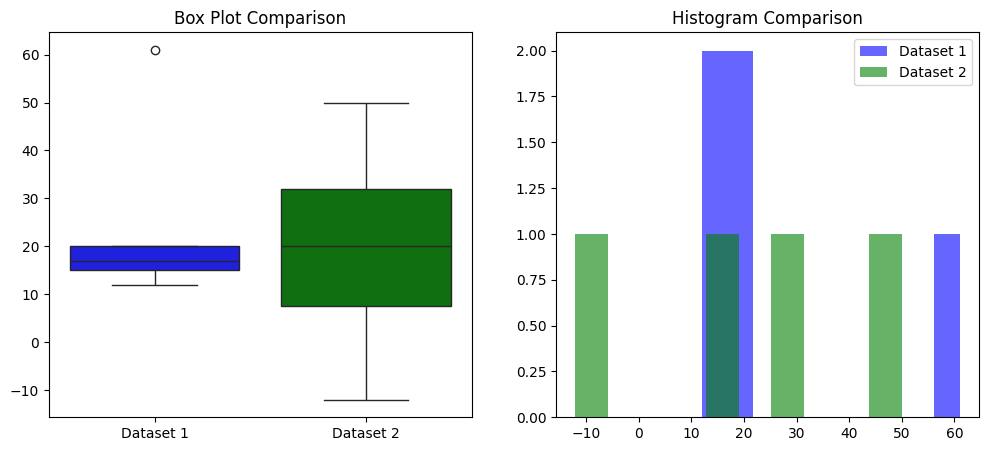

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import random

def get_dataset(prompt):
    user_input = input(f"Enter {prompt} (comma-separated) or press Enter to generate randomly: ")
    if user_input.strip():
        try:
            return [float(num) for num in user_input.split(',')]
        except ValueError:
            print("Invalid input. Generating random dataset instead.")
    return [random.randint(10, 100) for _ in range(30)]

def compute_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = statistics.mode(data) if len(set(data)) < len(data) else "No mode"
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)
    data_range = max(data) - min(data)
    return mean, median, mode, variance, std_dev, data_range

def print_comparison(stats1, stats2):
    labels = ["Mean", "Median", "Mode", "Variance", "Standard Deviation", "Range"]
    print("\nComparison of Statistics:")
    for label, s1, s2 in zip(labels, stats1, stats2):
        print(f"{label}: Dataset 1 = {s1}, Dataset 2 = {s2}")
    print("\nSummary:")
    print(f"Higher mean: {'Dataset 1' if stats1[0] > stats2[0] else 'Dataset 2'}")
    print(f"More spread out (higher std deviation): {'Dataset 1' if stats1[4] > stats2[4] else 'Dataset 2'}")

def visualize_data(data1, data2):
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=[data1, data2], palette=["blue", "green"])
    plt.xticks([0, 1], ["Dataset 1", "Dataset 2"])
    plt.title("Box Plot Comparison")
    
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(data1, bins=10, alpha=0.6, label="Dataset 1", color="blue")
    plt.hist(data2, bins=10, alpha=0.6, label="Dataset 2", color="green")
    plt.legend()
    plt.title("Histogram Comparison")
    
    plt.show()

# Main program
dataset1 = get_dataset("Dataset 1")
dataset2 = get_dataset("Dataset 2")

stats1 = compute_statistics(dataset1)
stats2 = compute_statistics(dataset2)

print_comparison(stats1, stats2)
visualize_data(dataset1, dataset2)


Enter a series of numbers (separated by commas):  15,20,20,30,60,100



    ## Statistical Report
    - **Mean**: 40.83
    - **Median**: 25.0
    - **Mode(s)**: 20.0
    - **Range**: 85.0
    - **Variance**: 1104.17
    - **Standard Deviation**: 33.23
    - **Q1 (25th percentile)**: 20.00
    - **Q2 (Median, 50th percentile)**: 25.00
    - **Q3 (75th percentile)**: 52.50
    - **Interquartile Range (IQR)**: 32.50
    - **Lower Fence**: -28.75
    - **Upper Fence**: 101.25
    - **Outliers**: None
    
Report saved as 'statistical_report.txt'


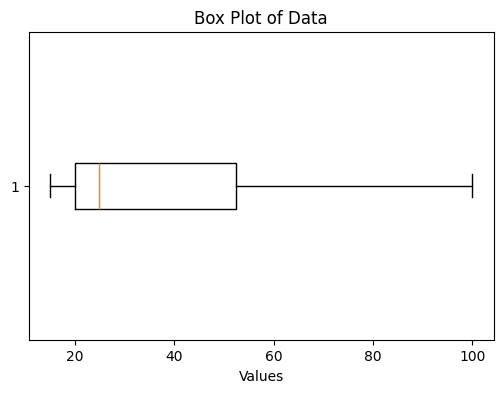

In [1]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

def compute_statistics():
    """Computes and prints a comprehensive statistical report."""
    user_input = input("Enter a series of numbers (separated by commas): ")
    try:
        numbers = [float(num.strip()) for num in user_input.split(',') if num.strip()]
        if not numbers:
            print("Error: No numbers provided.")
            return
    except ValueError:
        print("Error: Please enter only numerical values.")
        return
    
    numbers.sort()
    
    # Basic Statistics
    avg = statistics.mean(numbers)
    med = statistics.median(numbers)
    modes = statistics.multimode(numbers)
    data_range = max(numbers) - min(numbers)
    variance = statistics.variance(numbers)
    std_dev = statistics.stdev(numbers)
    
    # Quartiles and IQR
    Q1 = np.percentile(numbers, 25)
    Q2 = np.percentile(numbers, 50)
    Q3 = np.percentile(numbers, 75)
    IQR = Q3 - Q1
    
    # Outlier Detection (IQR Method)
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = [x for x in numbers if x < lower_fence or x > upper_fence]
    clean_data = [x for x in numbers if lower_fence <= x <= upper_fence]
    
    # Generate Report
    report = f"""
    ## Statistical Report
    - **Mean**: {avg:.2f}
    - **Median**: {med}
    - **Mode(s)**: {', '.join(map(str, modes))}
    - **Range**: {data_range}
    - **Variance**: {variance:.2f}
    - **Standard Deviation**: {std_dev:.2f}
    - **Q1 (25th percentile)**: {Q1:.2f}
    - **Q2 (Median, 50th percentile)**: {Q2:.2f}
    - **Q3 (75th percentile)**: {Q3:.2f}
    - **Interquartile Range (IQR)**: {IQR:.2f}
    - **Lower Fence**: {lower_fence:.2f}
    - **Upper Fence**: {upper_fence:.2f}
    - **Outliers**: {outliers if outliers else 'None'}
    """
    print(report)
    
    # Save Report to File
    with open("statistical_report.txt", "w") as file:
        file.write(report)
    print("Report saved as 'statistical_report.txt'")
    
    # Box Plot
    plt.figure(figsize=(6, 4))
    plt.boxplot(numbers, vert=False)
    plt.title("Box Plot of Data")
    plt.xlabel("Values")
    plt.show()

# Run the function
compute_statistics()
